In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

In [2]:
IMG_WIDTH = 216
IMG_HEIGHT = 250
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 20

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset (Ovarian Cancer)",
    shuffle=True,
    image_size = (IMG_WIDTH, IMG_HEIGHT),
    batch_size = BATCH_SIZE
)

Found 987 files belonging to 2 classes.


In [4]:
class_names = dataset.class_names
class_names

['Ovarian_Cancer', 'Ovarian_Non_Cancer']

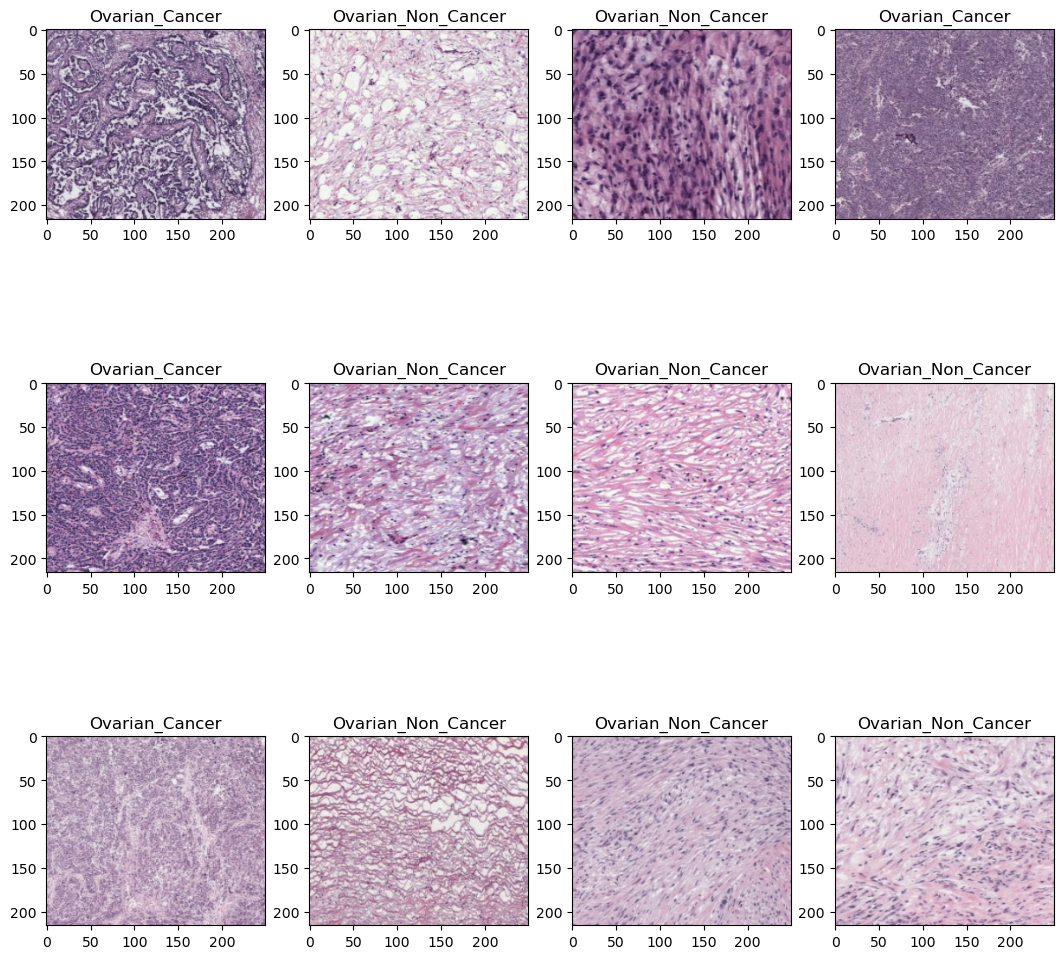

In [5]:
plt.figure(figsize=(13,13))
for img, label in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(img[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])

In [6]:
training_size = 0.8
validation_size = 0.1
len(dataset)*training_size

24.8

In [7]:
# training the model with 80% of the dataset
training_dataset = dataset.take(24)
len(training_dataset)

24

In [8]:
test_dataset = dataset.skip(24)
len(test_dataset)

7

In [9]:
len(dataset)*validation_size 

3.1

In [10]:
validation_dataset = test_dataset.take(3)
len(validation_dataset)

3

In [11]:
test_dataset = test_dataset.skip(3)
len(test_dataset)

4

In [12]:
# when cpu or gpu is busy performing training, prefetch will load the next set of batch from the disk

training_dataset = training_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
validation_dataset = validation_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_dataset = test_dataset.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [13]:
# PREPROCESSING
# the RGB array that was in range of 0-225, we need it to be between 0 and 1
def custom_preprocess(image):
    """
    Custom function to resize and rescale an image.
    """
    # Resize the image
    image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
    # Rescale the image
    image = image / 255.0
    return image

# Example of applying the custom preprocess function to a batch of images
def preprocess_batch(images):
    return np.array([custom_preprocess(image) for image in images])

In [14]:
# Data Augmentation - while predicting if the images are rotated or are of different contrast, predictions wont be accurate. To handle this, we use data augmentation

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [15]:
input_shape = (BATCH_SIZE, IMG_WIDTH,IMG_HEIGHT, CHANNELS)
no_of_classes = 2

# parameters : resized, augmentation, convolutional layer, pooling layer ... trial and error
model = models.Sequential([
    layers.InputLayer(input_shape=(IMG_WIDTH, IMG_HEIGHT, CHANNELS)),  # Specify input shape
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(no_of_classes, activation='softmax')
])

#model.build(input_shape=input_shape)

C:\Users\ashri\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [16]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 214, 248, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 107, 124, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 105, 122, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 52, 61, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 50, 59, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 25, 29, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 23, 27, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 11, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 9, 11, 64)      │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 4, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,394 (669.51 KB)

 Trainable params: 171,394 (669.51 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer='adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [18]:
history = model.fit(
    training_dataset,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data = validation_dataset
)

Epoch 1/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 26s 812ms/step - accuracy: 0.4594 - loss: 5.7751 - val_accuracy: 0.9167 - val_loss: 0.5221
Epoch 2/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 743ms/step - accuracy: 0.8346 - loss: 0.4400 - val_accuracy: 0.9167 - val_loss: 0.1898
Epoch 3/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 752ms/step - accuracy: 0.8966 - loss: 0.2507 - val_accuracy: 0.8646 - val_loss: 0.2738
Epoch 4/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 752ms/step - accuracy: 0.8735 - loss: 0.3081 - val_accuracy: 0.9167 - val_loss: 0.2240
Epoch 5/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 762ms/step - accuracy: 0.9138 - loss: 0.2449 - val_accuracy: 0.8542 - val_loss: 0.3023
Epoch 6/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 736ms/step - accuracy: 0.8892 - loss: 0.2811 - val_accuracy: 0.8333 - val_loss: 0.3548
Epoch 7/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 755ms/step - accuracy: 0.9045 - loss: 0.2427 - val_accuracy: 0.9375 - val_loss: 0.2168
Epoch 8/20
24/24 ━━━━━━━━━━━━━━━━━━━━ 18s 752ms/step - accuracy: 0.9480 - loss: 0.1564 - val_accu

In [19]:
scores = model.evaluate(test_dataset)

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.9827 - loss: 0.0574


In [20]:
scores

[0.06184089928865433, 0.9756097793579102]

In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

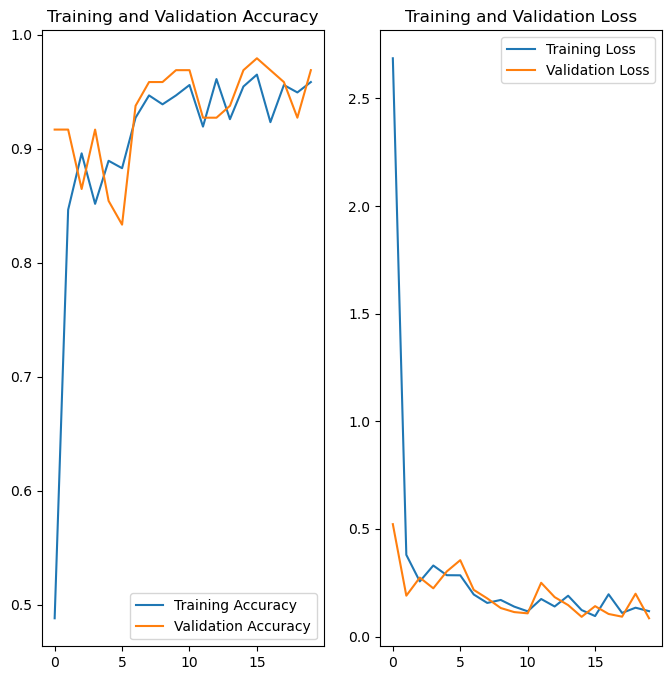

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Image to predict
the image's actual label :  Ovarian_Cancer
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step
the image's predicted label :  Ovarian_Cancer


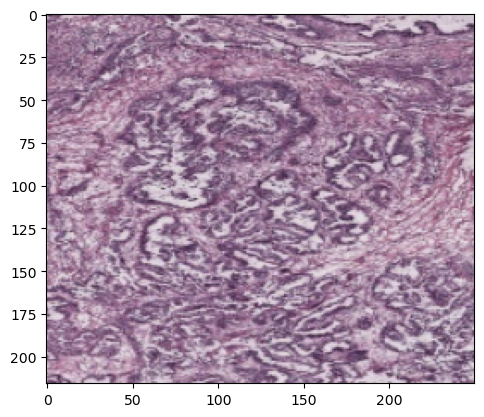

In [23]:
import numpy as np

# make predictions
# first prediction
for img_batch, label_batch in test_dataset.take(1):
    
    first_img = (img_batch[0].numpy().astype('uint8'))
    first_label = label_batch[0]
    
    print("Image to predict")
    plt.imshow(first_img)
    print("the image's actual label : ", class_names[first_label.numpy()])

    batch_prediction = model.predict(img_batch)
    print("the image's predicted label : ",class_names[np.argmax(batch_prediction[0])])

In [24]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    predictions = model.predict(img_array)
    predicted_class =  class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


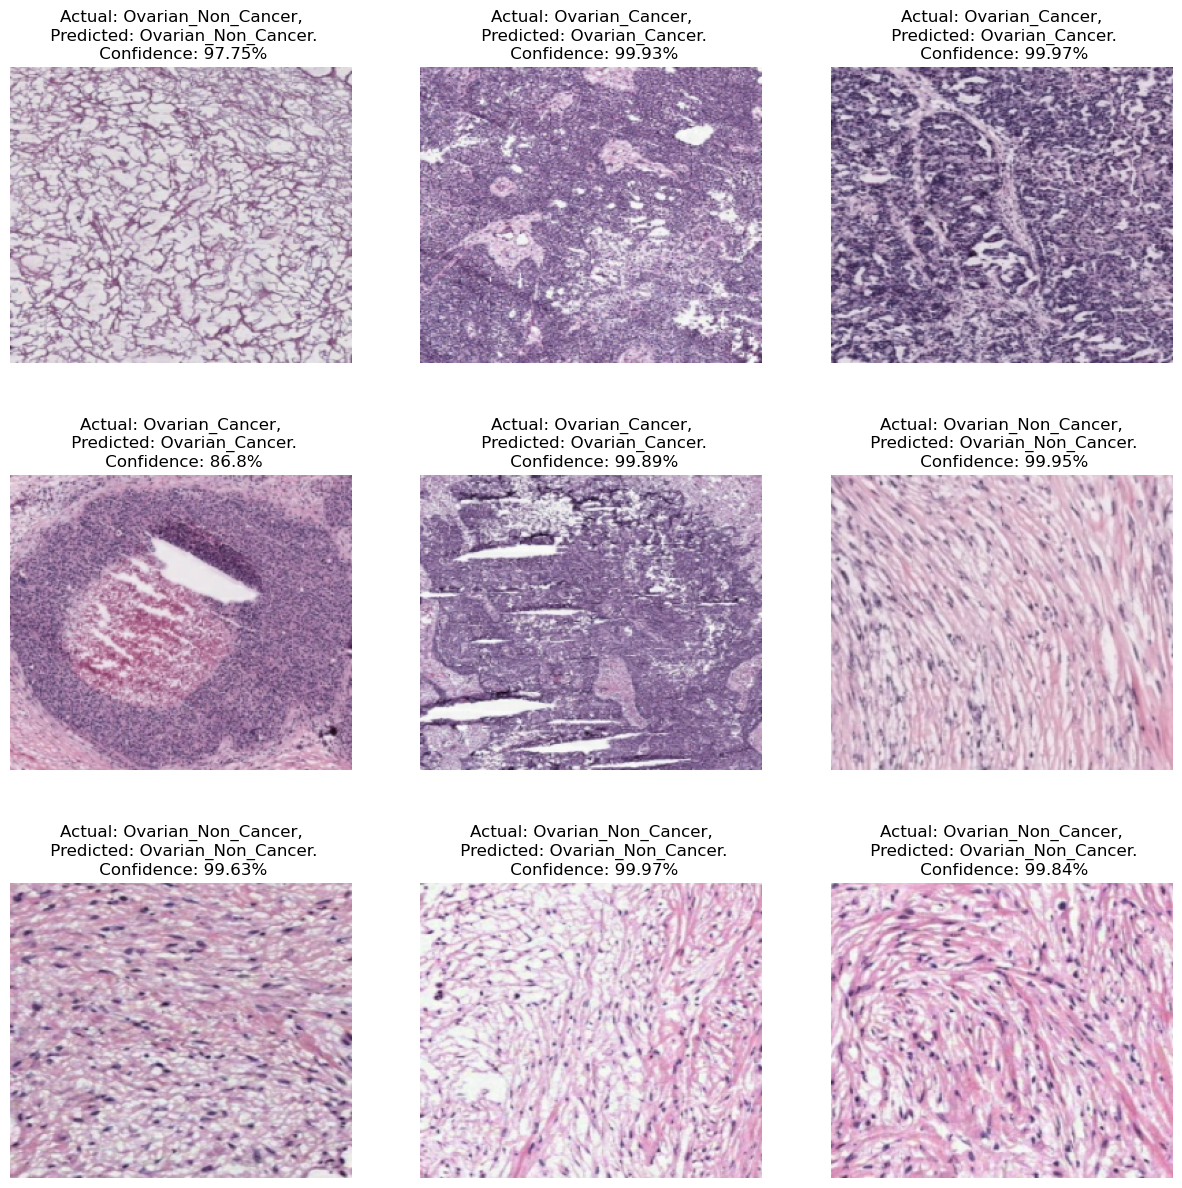

In [25]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [28]:
model_version = 4
model.save(f"../Models/Ovarian/{model_version}.h5")

In [ ]:
model_version = 2
model.save(f"../Models/Ovarian/model.keras")

In [26]:
model_version = 69
model.save(f"../Models/Ovarian/{model_version}.keras")

In [31]:
import tensorflow as tf

# Load the existing SavedModel
# model = tf.keras.models.load_model("Models/Ovarian/1")

# Save the model in .h5 format
# model.save("Models/Ovarian/69.keras")
model_version = 118
model.save(f"../Models/Ovarian/{model_version}.h5")


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

In [39]:
# Predicting on the validation dataset
# y_pred = model.predict(validation_dataset)  # Replace with test_dataset if using test data

# # Convert predictions from probabilities to class indices
# y_pred_classes = np.argmax(y_pred, axis=1)

# # Get true labels from the validation dataset
# y_true = np.concatenate([y for x, y in validation_dataset], axis=0)  # Extracting true labels

model_path = r'D:\sem-6\Cancer detection\Models\Ovarian\118.h5'
model = tf.keras.models.load_model(model_path)

# Initialize lists to hold actual labels and predicted labels
actual_labels = []
predicted_labels = []

# Iterate over the dataset to get predictions
for images, labels in dataset:
    predictions = model.predict(images)
    predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

    # Append the labels and predictions
    actual_labels.extend(labels.numpy())  # Convert from Tensor to NumPy array
    predicted_labels.extend(predicted_classes)

# Convert to numpy arrays
actual_labels = np.array(actual_labels)
predicted_labels = np.array(predicted_labels)

# Compute the confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 537ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

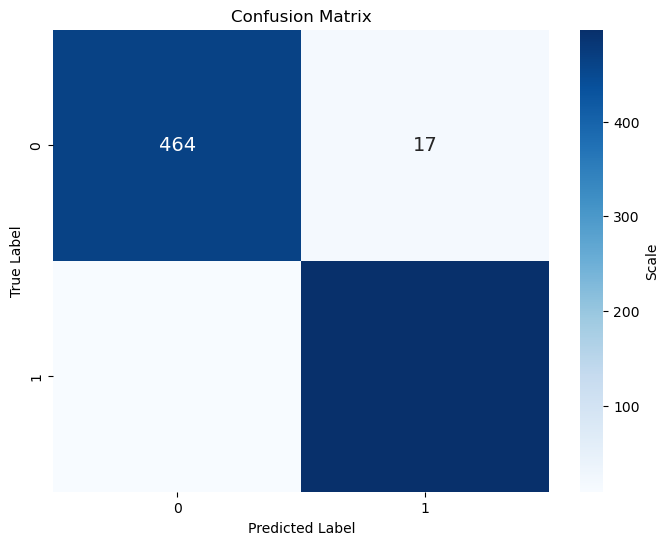

array([[464,  17],
       [  9, 497]], dtype=int64)

In [40]:
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

#Plotting the confusion matrix with improved settings
plt.figure(figsize=(8, 6), dpi=100)  # Increased resolution for clarity
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            annot_kws={"size": 14}, cbar_kws={'label': 'Scale'})  # Set font size for annotations

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
conf_matrix

In [41]:
class_report = classification_report(actual_labels, predicted_labels, target_names=['Ovarian_Cancer', 'Ovarian_Non_Cancer'])  
print("Classification Report:\n", class_report)

# Calculating accuracy
accuracy = accuracy_score(actual_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Classification Report:
                     precision    recall  f1-score   support

    Ovarian_Cancer       0.98      0.96      0.97       481
Ovarian_Non_Cancer       0.97      0.98      0.97       506

          accuracy                           0.97       987
         macro avg       0.97      0.97      0.97       987
      weighted avg       0.97      0.97      0.97       987

Accuracy: 0.97


In [54]:
y_pred = model.predict(validation_dataset)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step


array([1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0], dtype=int64)